# Multimédia TP1 - Compressão de Imagem

David Leitão \[2019223148\]

Rodrigo Machado \[2019218299\]

Rui Costa \[2019224237\]

In [1]:
# Notebook setup
%matplotlib inline

from main import *
from helper import *
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 5]

basePath = "imagens"
barn = f"{basePath}/barn_mountains.bmp"
peppers = f"{basePath}/peppers.bmp"
logo = f"{basePath}/logo.bmp"

## 1. Compressão de imagens BMP no formato JPEG utilizando GIMP

In [2]:
basePath = "imagens"
image = "barn_mountains"

### 1.1 Compressão de imagens segundo o codec JPEG, com a qualidade alta


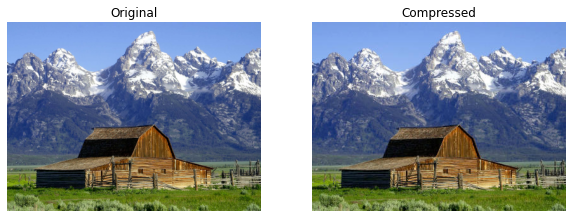

In [3]:
originalImage = np.array(Image.open(f"{basePath}/{image}.bmp"))
compressedImage = np.array(Image.open(f"{basePath}/high/{image}.jpg"))
viewComparison(originalImage, compressedImage)

### 1.2 Compressão de imagens segundo o codec JPEG, com a qualidade média


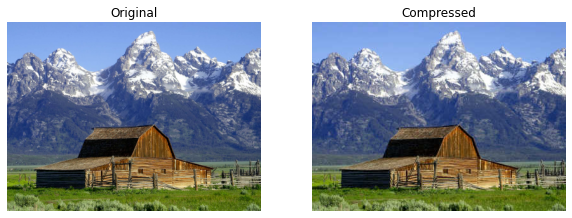

In [4]:
originalImage = np.array(Image.open(f"{basePath}/{image}.bmp"))
compressedImage = np.array(Image.open(f"{basePath}/medium/{image}.jpg"))
viewComparison(originalImage, compressedImage)

### 1.3 Compressão de imagens segundo o codec JPEG, com a qualidade baixa

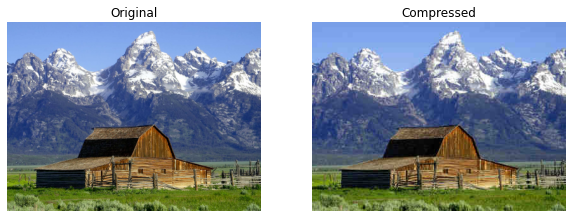

In [5]:
originalImage = np.array(Image.open(f"{basePath}/{image}.bmp"))
compressedImage = np.array(Image.open(f"{basePath}/low/{image}.jpg"))
viewComparison(originalImage, compressedImage)

### 1.4 Análise subjetiva

TODO fazer a análise e comparação subjetiva da qualidade das imagens comprimidas

## 3. Visualização de uma imagem representada pelo modelo RGB

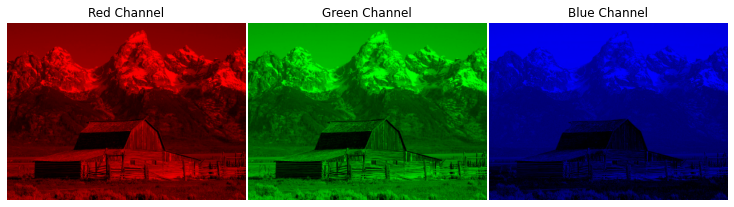

In [6]:
image = np.array(Image.open(barn))
originalShape = image.shape
r, g, b = sepRGB(image)
viewRGB(r, g, b)

## 4. Padding

Shape original: (297, 400)
Shape após padding: (304, 400)
Shape recuperada: (297, 400)


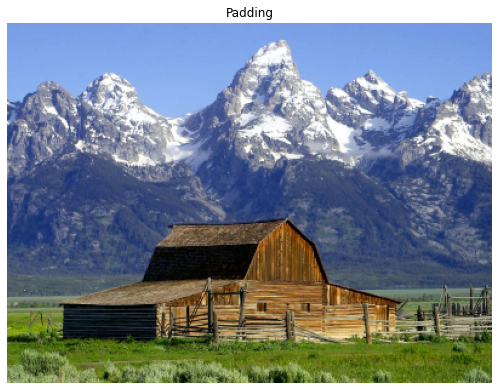

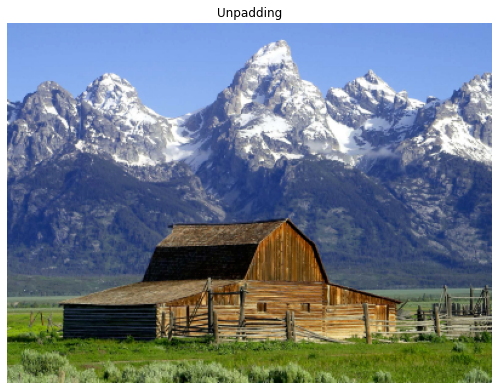

In [7]:
pr, pg, pb = padding(r, g, b)
viewPadding(r, g, b)
print(f"Shape original: {originalShape[:-1]}")
print(f"Shape após padding: {pr.shape}")
paddedImg = unpadding(joinRGB(r, g, b), originalShape)
print(f"Shape recuperada: {paddedImg.shape[:-1]}")
plt.figure()
plt.title("Unpadding")
viewImage(paddedImg)

## 5. Conversão para o modelo de cor YCbCr

O pixel [0,0] mantém-se após a conversão?
Sim


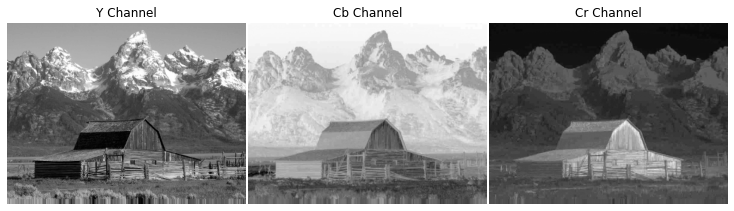

In [8]:
y, cb, cr = ycbcr(pr, pg, pb)
plt.figure()
viewYCbCr(y, cb, cr)
tmp = rgb(y, cb, cr)
comp = tmp[0,0,0] == image[0,0,0] and tmp[0,0,1] == image[0,0,1] and tmp[0,0,2] == image[0,0,2]
print("O pixel [0,0] mantém-se após a conversão?")
print("Sim" if comp else "Não")

### 5.4 Comparação do canal Y com os canais RGB, e com Cb e Cr

**TODO**

## 6. Chroma Resampling

Antes de chroma downsampling
Y:(304, 400) Cb:(304, 400) Cr:(304, 400)

Após chroma downsampling
Y:(304, 400) Cb:(152, 200) Cr:(152, 200)

Após chroma resampling
Y:(304, 400) Cb:(304, 400) Cr:(304, 400)


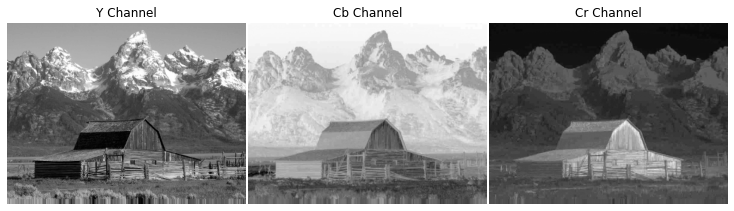

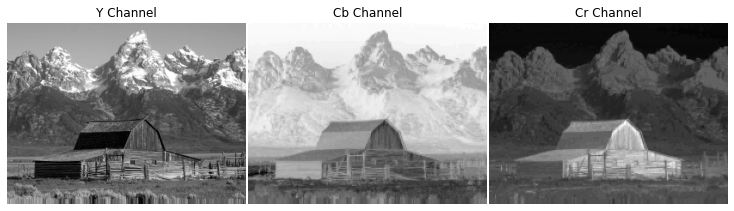

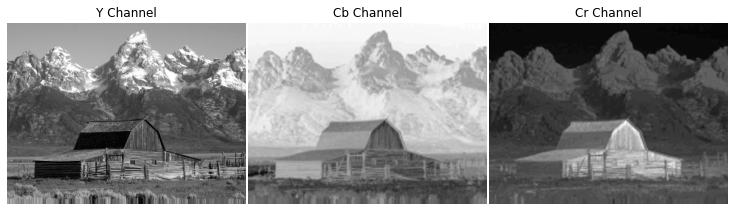

In [9]:
viewYCbCr(y, cb, cr)
print("Antes de chroma downsampling")
print(f"Y:{y.shape} Cb:{cb.shape} Cr:{cr.shape}\n")
ratio = (4, 2, 0)
subcb, subcr = subsampler((cb, cr), ratio)
plt.figure()
viewYCbCr(y, subcb, subcr)
print("Após chroma downsampling")
print(f"Y:{y.shape} Cb:{subcb.shape} Cr:{subcr.shape}\n")
ucb, ucr = upsampler(subcb, subcr, y.shape)
plt.figure()
viewYCbCr(y, ucb, ucr)
print("Após chroma resampling")
print(f"Y:{y.shape} Cb:{ucb.shape} Cr:{ucr.shape}")

**TODO Análise da taxa de compressão**

## 7. Transformada de Coseno Discreta (DCT)

### 7.1 DCT nos canais completos

O pixel [0,0] mantém-se após a conversão? (Margem de erro: 0.0005)
Sim


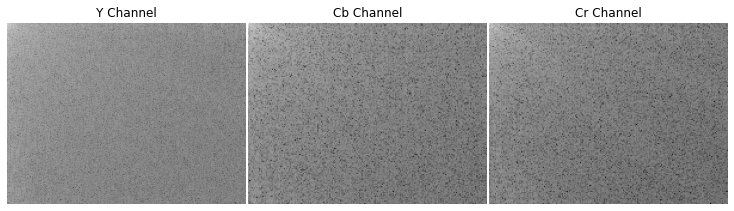

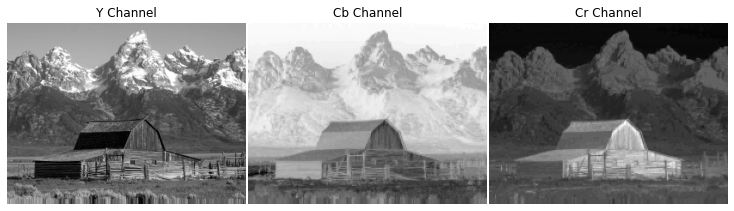

In [10]:
tdy = dct(y)
tdcb = dct(subcb)
tdcr = dct(subcr)
viewDct(tdy, tdcb, tdcr)
tidy = idct(tdy)
tidcb = idct(tdcb)
tidcr = idct(tdcr)
plt.figure()
viewYCbCr(tidy, tidcb, tidcr)
# Por causa de cálculos em floating point, existe um problema de precisão pelo que a
# comparação entre os píxeis tem de ser feita com uma margem de erro
margin = 0.000001
comp = abs(tidy[0,0] - y[0,0]) < 0.000001
comp = comp and abs(tidcb[0,0] - subcb[0,0]) < 0.000001
comp = comp and abs(tidcr[0,0] - subcr[0,0]) < 0.000001
print("O pixel [0,0] mantém-se após a conversão? (Margem de erro: 0.0005)")
print("Sim" if comp else "Não")

### 7.2 DCT em blocos 8x8

O pixel [0,0] mantém-se após a conversão? (Margem de erro: 0.0005)
Sim


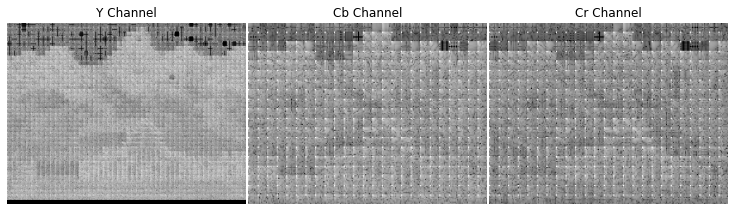

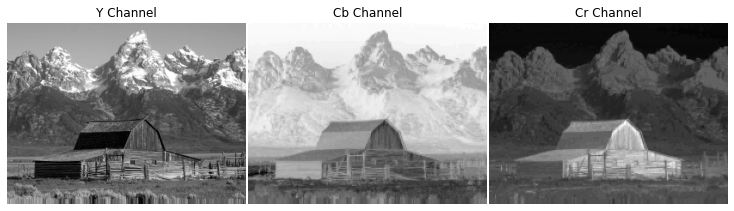

In [11]:
dy = blockDct(y)
dcb = blockDct(subcb)
dcr = blockDct(subcr)
plt.figure()
viewDct(dy, dcb, dcr)
idy = blockIdct(dy)
idcb = blockIdct(dcb)
idcr = blockIdct(dcr)
plt.figure()
viewYCbCr(idy, idcb, idcr)
margin = 0.000001
comp = abs(idy[0,0] - y[0,0]) < 0.000001
comp = comp and abs(idcb[0,0] - subcb[0,0]) < 0.000001
comp = comp and abs(idcr[0,0] - subcr[0,0]) < 0.000001
print("O pixel [0,0] mantém-se após a conversão? (Margem de erro: 0.0005)")
print("Sim" if comp else "Não")

### 7.3 DCT em blocos 64x64

O pixel [0,0] mantém-se após a conversão? (Margem de erro: 1e-06)
Sim


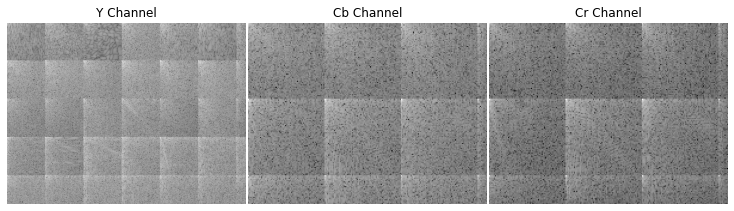

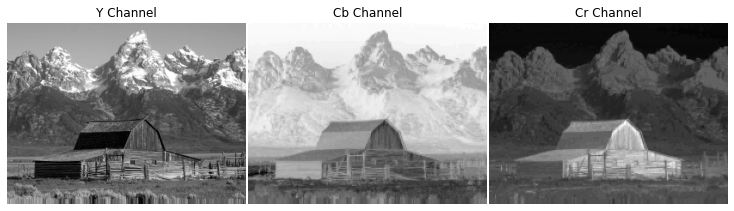

In [12]:
tdy = blockDct(y, size=64)
tdcb = blockDct(subcb, size=64)
tdcr = blockDct(subcr, size=64)
plt.figure()
viewDct(tdy, tdcb, tdcr)
tidy = blockIdct(tdy, size=64)
tidcb = blockIdct(tdcb, size=64)
tidcr = blockIdct(tdcr, size=64)
plt.figure()
viewYCbCr(tidy, tidcb, tidcr)
margin = 0.000001
comp = abs(tidy[0,0] - y[0,0]) < margin
comp = comp and abs(tidcb[0,0] - subcb[0,0]) < margin
comp = comp and abs(tidcr[0,0] - subcr[0,0]) < margin
print(f"O pixel [0,0] mantém-se após a conversão? (Margem de erro: {margin})")
print("Sim" if comp else "Não")

## 8. Quantização

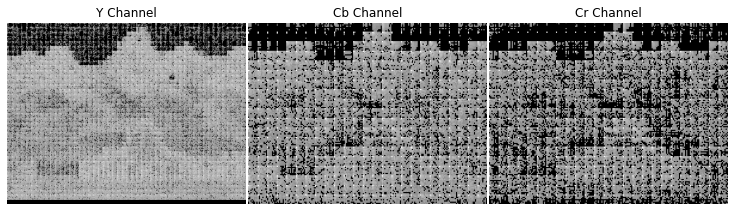

In [13]:
qf = 100
tqy, tqcb, tqcr = quantize((dy, dcb, dcr), qf)
viewDct(tqy, tqcb, tqcr)

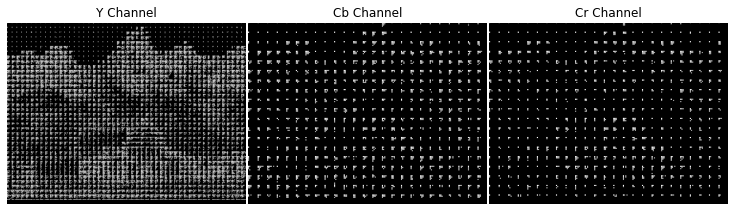

In [14]:
qf = 75
qy, qcb, qcr = quantize((dy, dcb, dcr), qf)
viewDct(qy, qcb, qcr)

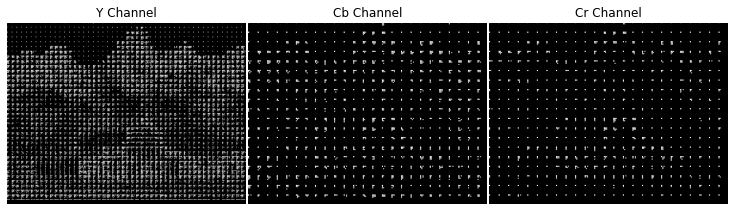

In [15]:
qf = 50
tqy, tqcb, tqcr = quantize((dy, dcb, dcr), qf)
viewDct(tqy, tqcb, tqcr)

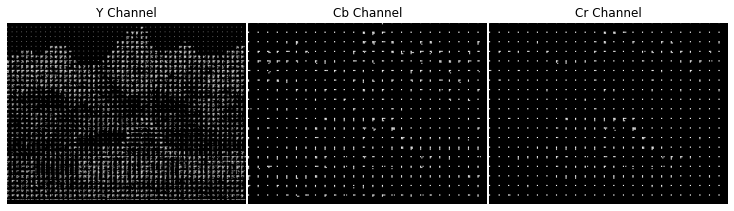

In [16]:
qf = 25
tqy, tqcb, tqcr = quantize((dy, dcb, dcr), qf)
viewDct(tqy, tqcb, tqcr)

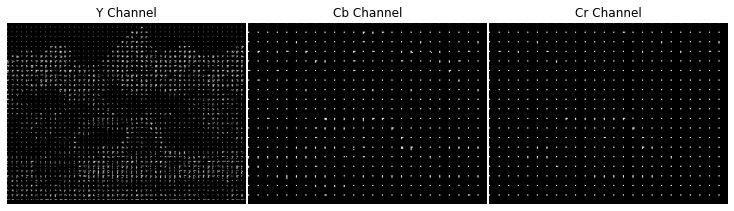

In [17]:
qf = 10
tqy, tqcb, tqcr = quantize((dy, dcb, dcr), qf)
viewDct(tqy, tqcb, tqcr)

## 9. Codificação DPCM dos coeficientes DC

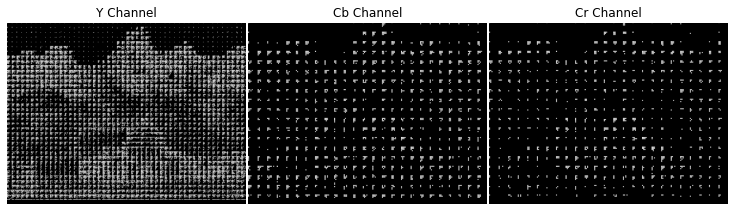

In [18]:
cy = DPCM(qy)
ccb = DPCM(qcb)
ccr = DPCM(qcr)
viewDct(cy, ccb, ccr)

## 10. Codificação e descodificação end-to-end

#### barn_mountains.bmp

MSE: 20.550
RMSE: 4.533
SNR: 54.015 dB
PSNR: 35.003 dB


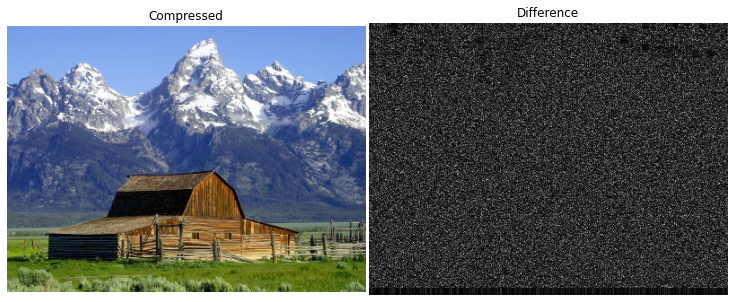

In [19]:
verboseMetrics(barn, qf=100)

MSE: 171.586
RMSE: 13.099
SNR: 44.798 dB
PSNR: 25.786 dB


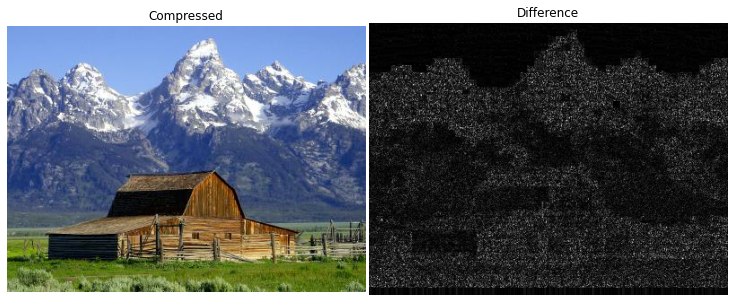

In [20]:
verboseMetrics(barn, qf=75)

MSE: 282.302
RMSE: 16.802
SNR: 42.635 dB
PSNR: 23.624 dB


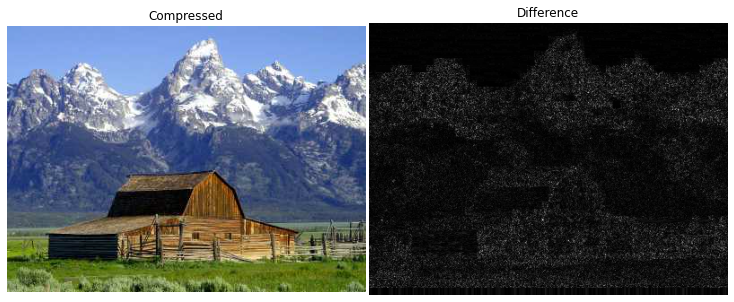

In [21]:
verboseMetrics(barn, qf=50)

MSE: 422.080
RMSE: 20.545
SNR: 40.889 dB
PSNR: 21.877 dB


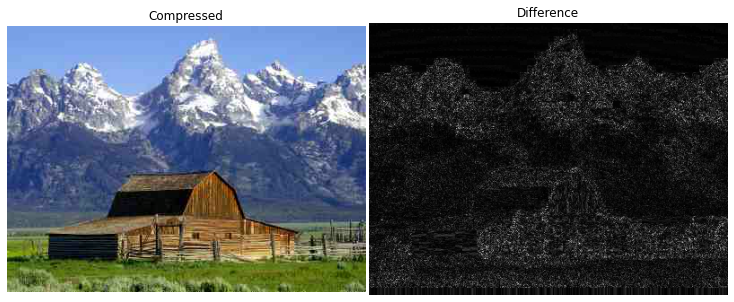

In [22]:
verboseMetrics(barn, qf=25)

MSE: 740.352
RMSE: 27.209
SNR: 38.448 dB
PSNR: 19.436 dB


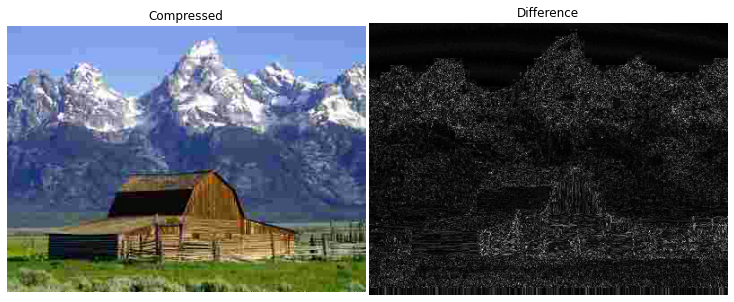

In [23]:
verboseMetrics(barn, qf=10)